In [3]:
import os
import math
import glob
import datetime
from PIL import Image
from shapely.geometry import Polygon
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import matplotlib.colors
import matplotlib.patches as mpathes
from matplotlib.path import Path
from mpl_toolkits.basemap import Basemap
import shapefile

def cmap_own():
    cmap_value = np.loadtxt('/exports/swj/OMI_results/result_compare/colormap_22.txt')
    cmap = []
    for i in range(cmap_value.shape[0]):
        cmap.append((cmap_value[i, 0], cmap_value[i, 1], cmap_value[i, 2]))

    return matplotlib.colors.LinearSegmentedColormap.from_list('test_cmap', cmap, N=cmap_value.shape[0])

def shp2clip(originfig,ax,shpfile,region):
    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] in region:
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append((pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = mpathes.PathPatch(clip, transform=ax.transData)
    for contour in originfig.collections:
        contour.set_clip_path(clip)
    return clip

def wgs84toWebMercator(lon,lat):
    x =  lon*20037508.342789/180
    y =math.log(math.tan((90+lat)*math.pi/360))/(math.pi/180)
    y = y *20037508.34789/180
    return x,y

fpath = os.path.join(matplotlib.get_data_path(),'/exports/WST/himawari/tif_test/Bold.ttf')
prop = fm.FontProperties(fname=fpath)

fname = os.path.split(fpath)[1]

lat_begin=28.5
lat_end=35
lon_begin=114.5
lon_end=120

fig = plt.figure(figsize=((lon_end-lon_begin)*2, (lat_end-lat_begin)*2))
ax1 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
m = Basemap(projection='cyl', resolution='l', llcrnrlat=lat_begin, urcrnrlat=lat_end, llcrnrlon=lon_begin, urcrnrlon=lon_end)

m.readshapefile("/exports/WST/himawari/tif_test/anhuishp/anhuinew/anhui", 'NAME1', linewidth=1, drawbounds=True, color='gray')

for shapedict, state in zip(m.NAME1_info, m.NAME1):
    short_name = shapedict['市']
    point = np.array(state)
    # x,y = center_geolocation(point)
    # 获取城市图形的中点
    ref_polygon = Polygon(point)
    # get the x and y coordinate of the centroid
    x, y = [float(ref_polygon.centroid.wkt[7:19]), float(ref_polygon.centroid.wkt[25:39])]
    # x, y = np.mean(np.array(state), axis=0)
    # if (short_name == '连云港市')|(short_name == '南通市'):
    if point.shape[0] < 100:
        continue
    else:
        plt.annotate(short_name[0:-1].format(fname), xy=(x - 0.2, y - 0.1), fontproperties=prop, fontsize=12)

cdict = ['#FFFFFF', '#C2C8E1', '#9BA9DC', '#4C9DF4', '#86D1F9', '#A7E5EF', '#FEFC59', '#FD7822', '#FC131F',
         '#A3090E']
colormap = cmap_own()
colormap.set_bad(color='w', alpha=0.0)

position = fig.add_axes([0.88, 0.1, 0.03, 0.7])

plt.tight_layout()

time_target=''
plt.savefig('./tropomi_Anhui_HCHO_' + time_target + '.png', dpi=300)
plt.close()
str_day = './tropomi_Anhui_HCHO_' + time_target + '.png'
img = Image.open(str_day)
img = img.convert('RGBA')

png = Image.open('/satellite/exports1/zhaochunhui/normal/pic/logotest4.png')
png = png.resize((int(img.size[0] * 0.7 -3) , int(img.size[0] * 0.07)), Image.ANTIALIAS)
r, g, b, a = png.split()
png_x = int(img.size[0] / 10) + 2
png_y = int(img.size[1] * 0.9) - int(img.size[0] * 0.07)-5
img.paste(png, (png_x, png_y), mask=a)
img.save(str_day, quality=95)

/tmp/ipykernel_326436/4040225787.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_326436/4040225787.py:100: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  png = png.resize((int(img.size[0] * 0.7 -3) , int(img.size[0] * 0.07)), Image.ANTIALIAS)


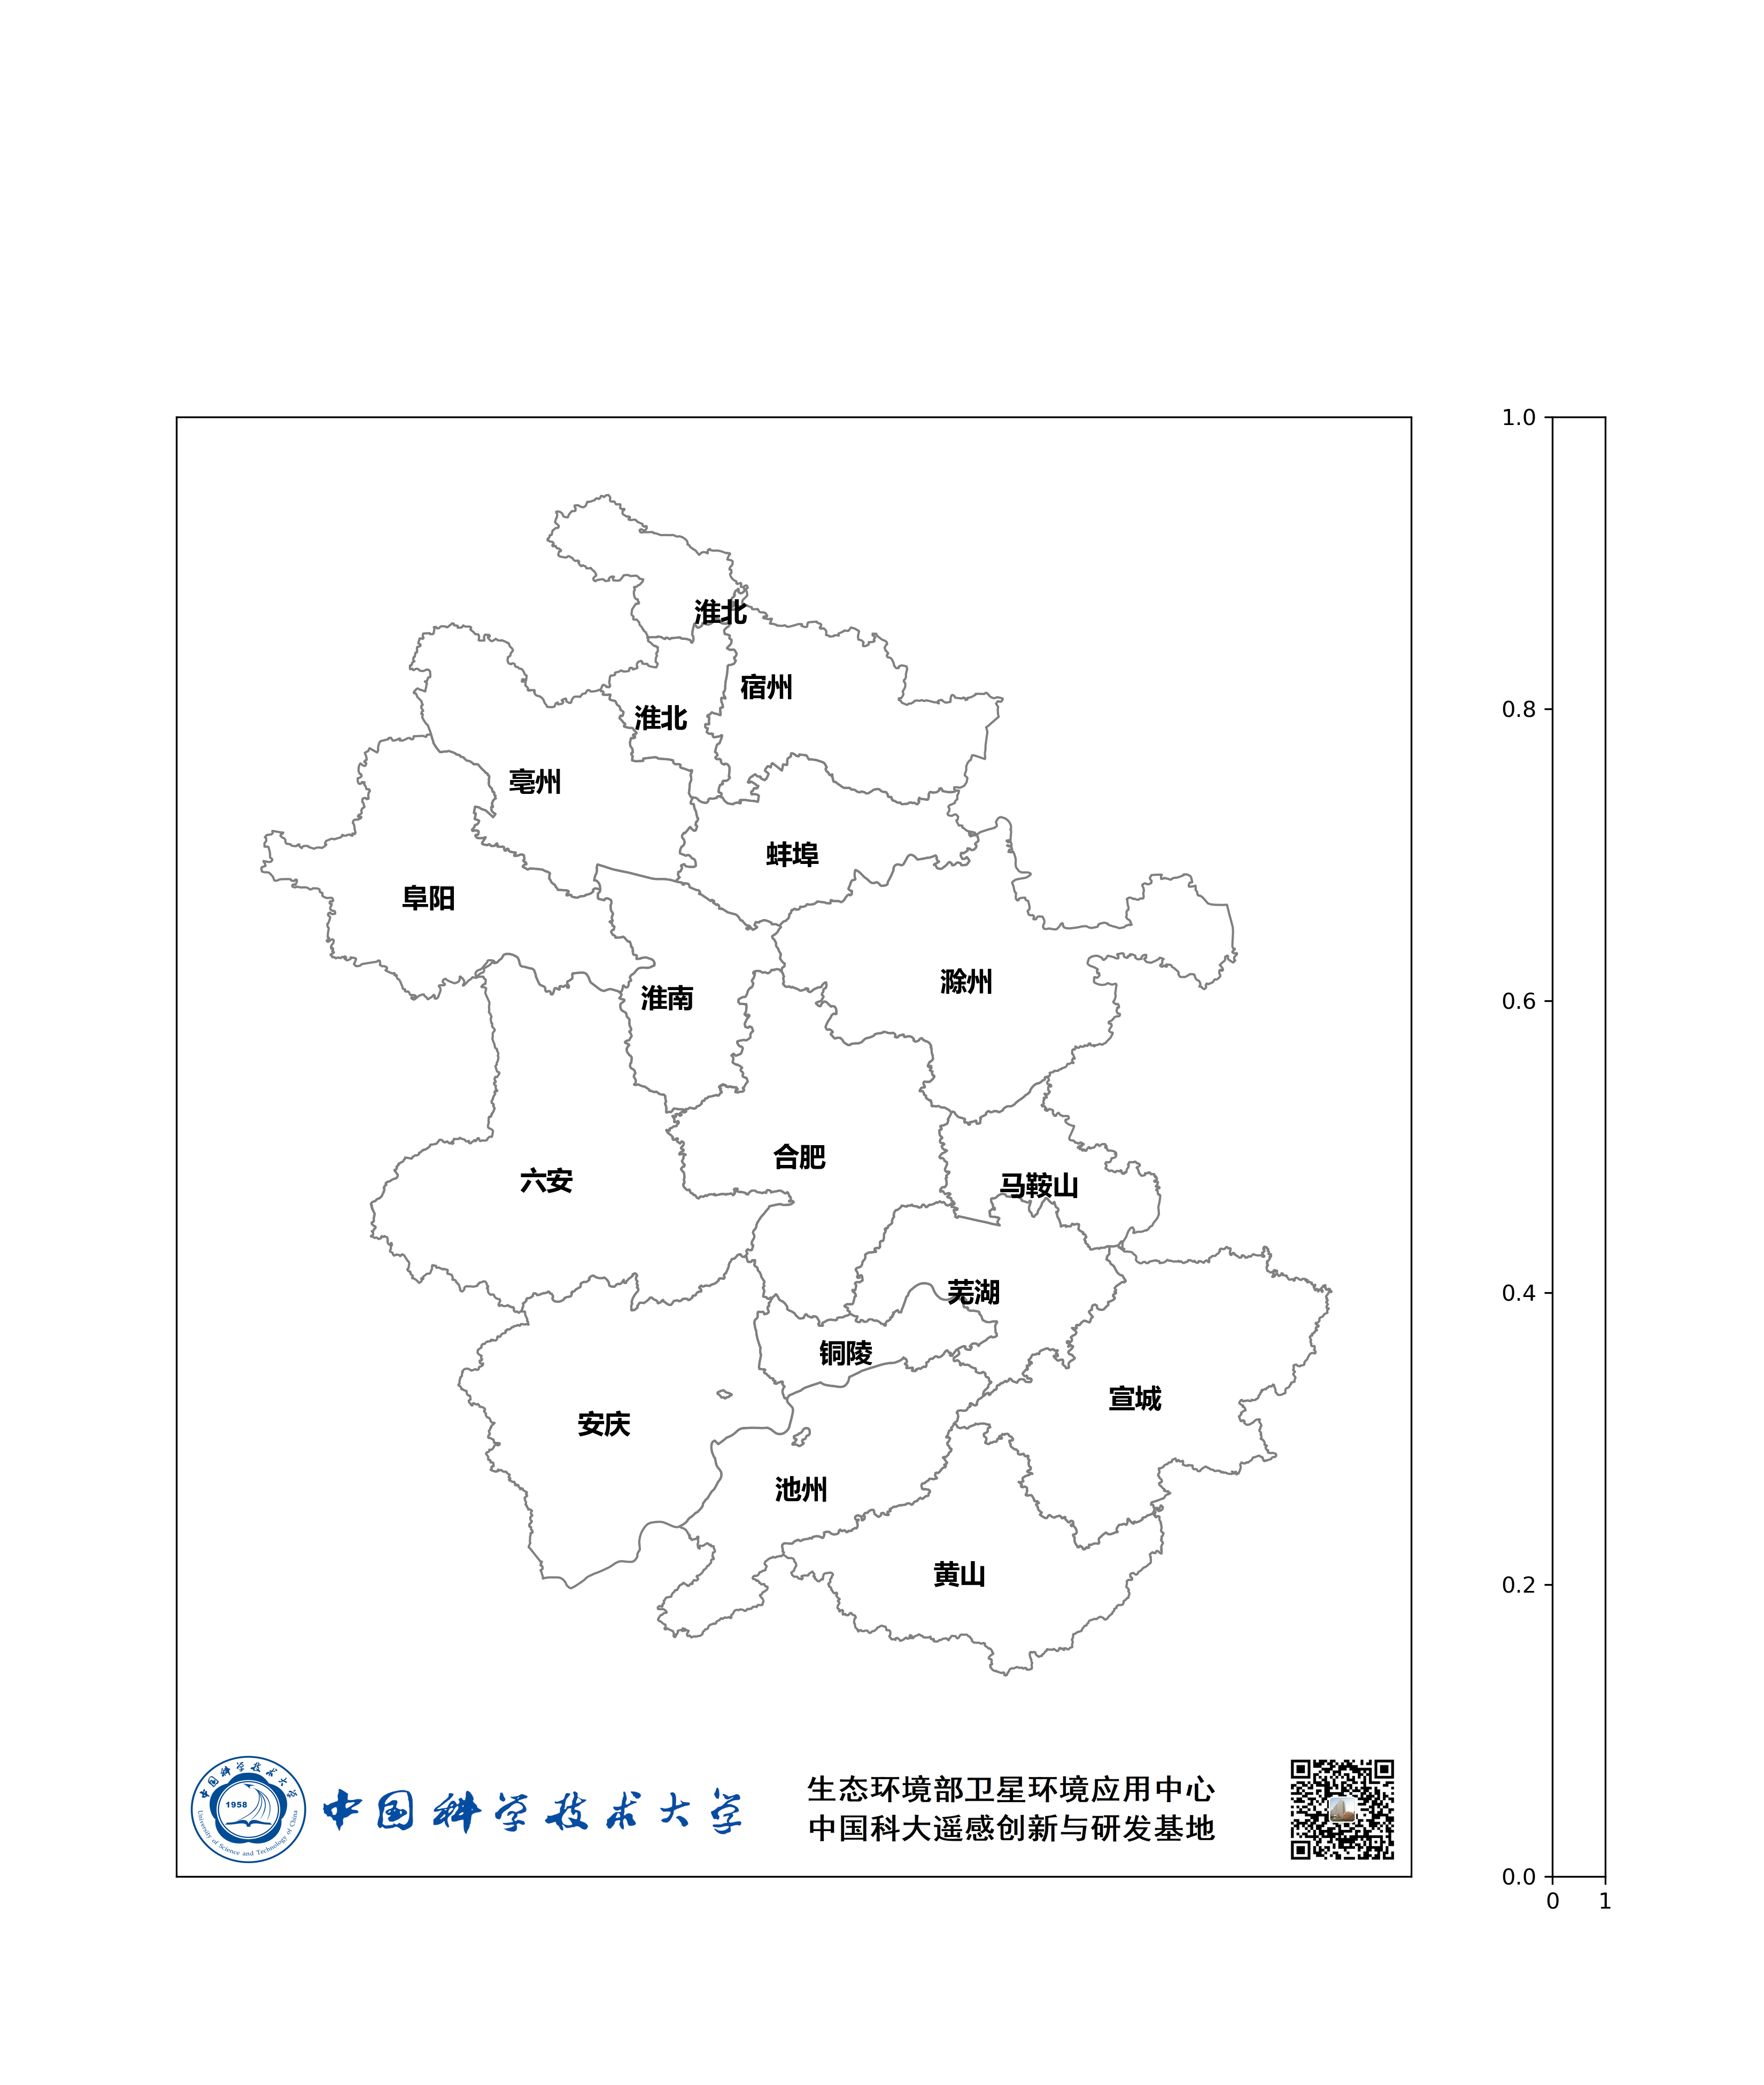

In [4]:
from PIL import Image
import numpy as np


img_PIL = Image.open(str_day)#读取数据
img_PIL